<a href="https://colab.research.google.com/github/KARTH33K/Machine-Learning/blob/main/Random_Forrest_Town_Economic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Town Economic Data

The purpose of this model is to use Massachussetts economic data and try to  predict Connecticut economic data with a basic random forrest regressor.

# 1.   Import the data, mount your Drive, print df.shape, and use df.info() to look for any missing values.

![MA image](https://upload.wikimedia.org/wikipedia/commons/7/7e/Towns_income_per_capita_in_MA.jpg)

Figure: Map of locations by per capita income. Areas with higher levels of income are shaded darker.

* https://en.wikipedia.org/wiki/List_of_Massachusetts_locations_by_per_capita_income

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Nov 22 20:15:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0    48W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_Massachusetts_locations_by_per_capita_income')[2]
df

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,Town,Middlesex,"$105,217","$256,300","$250,000+",11261,10769
1,2,Dover,Town,Norfolk,"$89,476","$187,829","$193,750",6279,5891
2,3,Sherborn,Town,Middlesex,"$82,550","$172,750","$177,845",4301,3541
3,4,Brookline,Town,Norfolk,"$77,585","$160,034","$175,833",59180,38431
4,5,Newton,City,Middlesex,"$73,420","$119,148","$154,787",88593,78427
...,...,...,...,...,...,...,...,...,...
292,296,Amherst,Town,Hampshire,"$19,796","$53,191","$96,733",38651,8583
293,297,Springfield,City,Hampden,"$18,133","$34,311","$39,535",153428,55894
294,298,Lawrence,City,Essex,"$16,987","$32,851","$36,073",76820,26455
295,299,Pelham,Town,Hampshire,"$50,637","$82,596","$94,688",1353,575


In [ ]:
df.shape
# 297 rows and 9 columns

(297, 9)

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv('/content/drive/MyDrive/file.csv')

# 2. Clean the data. Remove special characters like $ , and + and coerce appropriate columns to numeric.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   297 non-null    int64 
 1   Municipality           297 non-null    object
 2   Type                   297 non-null    object
 3   County                 297 non-null    object
 4   Per capitaincome       297 non-null    object
 5   Medianhouseholdincome  297 non-null    object
 6   Medianfamilyincome     297 non-null    object
 7   Population             297 non-null    int64 
 8   Number ofhouseholds    297 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 21.0+ KB


## Checking the presence of "$" and "+" in appropriate columns

In [ ]:
df[df['Per capitaincome'].str.contains("\+")]
# no rows having "+"
# no need to replace text

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds


In [ ]:
df[df['Per capitaincome'].str.contains("\$")]
# 297 rows has "$"
# needs text replacement

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,Town,Middlesex,"$105,217","$256,300","$250,000+",11261,10769
1,2,Dover,Town,Norfolk,"$89,476","$187,829","$193,750",6279,5891
2,3,Sherborn,Town,Middlesex,"$82,550","$172,750","$177,845",4301,3541
3,4,Brookline,Town,Norfolk,"$77,585","$160,034","$175,833",59180,38431
4,5,Newton,City,Middlesex,"$73,420","$119,148","$154,787",88593,78427
...,...,...,...,...,...,...,...,...,...
292,296,Amherst,Town,Hampshire,"$19,796","$53,191","$96,733",38651,8583
293,297,Springfield,City,Hampden,"$18,133","$34,311","$39,535",153428,55894
294,298,Lawrence,City,Essex,"$16,987","$32,851","$36,073",76820,26455
295,299,Pelham,Town,Hampshire,"$50,637","$82,596","$94,688",1353,575


In [ ]:
df[df['Medianhouseholdincome'].str.contains("\$")]
# 297 rows
# needs text replacement

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,Town,Middlesex,"$105,217","$256,300","$250,000+",11261,10769
1,2,Dover,Town,Norfolk,"$89,476","$187,829","$193,750",6279,5891
2,3,Sherborn,Town,Middlesex,"$82,550","$172,750","$177,845",4301,3541
3,4,Brookline,Town,Norfolk,"$77,585","$160,034","$175,833",59180,38431
4,5,Newton,City,Middlesex,"$73,420","$119,148","$154,787",88593,78427
...,...,...,...,...,...,...,...,...,...
292,296,Amherst,Town,Hampshire,"$19,796","$53,191","$96,733",38651,8583
293,297,Springfield,City,Hampden,"$18,133","$34,311","$39,535",153428,55894
294,298,Lawrence,City,Essex,"$16,987","$32,851","$36,073",76820,26455
295,299,Pelham,Town,Hampshire,"$50,637","$82,596","$94,688",1353,575


In [ ]:
df[df['Medianhouseholdincome'].str.contains("\+")]
# no rows have "+"
# no need of text replacement

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds


In [ ]:
df[df['Medianfamilyincome'].str.contains("\$")]
# 297 rows

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,Town,Middlesex,"$105,217","$256,300","$250,000+",11261,10769
1,2,Dover,Town,Norfolk,"$89,476","$187,829","$193,750",6279,5891
2,3,Sherborn,Town,Middlesex,"$82,550","$172,750","$177,845",4301,3541
3,4,Brookline,Town,Norfolk,"$77,585","$160,034","$175,833",59180,38431
4,5,Newton,City,Middlesex,"$73,420","$119,148","$154,787",88593,78427
...,...,...,...,...,...,...,...,...,...
292,296,Amherst,Town,Hampshire,"$19,796","$53,191","$96,733",38651,8583
293,297,Springfield,City,Hampden,"$18,133","$34,311","$39,535",153428,55894
294,298,Lawrence,City,Essex,"$16,987","$32,851","$36,073",76820,26455
295,299,Pelham,Town,Hampshire,"$50,637","$82,596","$94,688",1353,575


In [ ]:
df[df['Medianfamilyincome'].str.contains("\+")]
# 1 row
# needs text replacement

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,Town,Middlesex,"$105,217","$256,300","$250,000+",11261,10769


## Replacing the characters

In [ ]:
df['Per capitaincome'] = df['Per capitaincome'].str.replace('$','') # replacing $ symbol with nothing
df['Medianhouseholdincome'] = df['Medianhouseholdincome'].str.replace('$','') # replacing $ symbol with nothing
df['Medianfamilyincome'] = df['Medianfamilyincome'].str.replace('$','') # replacing $ symbol with nothing
df['Medianfamilyincome'] = df['Medianfamilyincome'].str.replace('+','') # replacing + symbol with nothing

df['Per capitaincome'] = df['Per capitaincome'].str.replace(',','') # replacing $ symbol with nothing
df['Medianhouseholdincome'] = df['Medianhouseholdincome'].str.replace(',','') # replacing $ symbol with nothing
df['Medianfamilyincome'] = df['Medianfamilyincome'].str.replace(',','') # replacing $ symbol with nothing
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: Fut

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,Town,Middlesex,105217,256300,250000,11261,10769
1,2,Dover,Town,Norfolk,89476,187829,193750,6279,5891
2,3,Sherborn,Town,Middlesex,82550,172750,177845,4301,3541
3,4,Brookline,Town,Norfolk,77585,160034,175833,59180,38431
4,5,Newton,City,Middlesex,73420,119148,154787,88593,78427
...,...,...,...,...,...,...,...,...,...
292,296,Amherst,Town,Hampshire,19796,53191,96733,38651,8583
293,297,Springfield,City,Hampden,18133,34311,39535,153428,55894
294,298,Lawrence,City,Essex,16987,32851,36073,76820,26455
295,299,Pelham,Town,Hampshire,50637,82596,94688,1353,575


## changing columns astype to numeric

In [ ]:
df['Per capitaincome'] = df['Per capitaincome'].astype(np.int64)
df['Medianhouseholdincome'] = df['Medianhouseholdincome'].astype(np.int64)
df['Medianfamilyincome'] = df['Medianfamilyincome'].astype(np.int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   297 non-null    int64 
 1   Municipality           297 non-null    object
 2   Type                   297 non-null    object
 3   County                 297 non-null    object
 4   Per capitaincome       297 non-null    int64 
 5   Medianhouseholdincome  297 non-null    int64 
 6   Medianfamilyincome     297 non-null    int64 
 7   Population             297 non-null    int64 
 8   Number ofhouseholds    297 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 21.0+ KB


## Flag variables

In [ ]:
df['Type'].unique()

array(['Town', 'City', 'Essex'], dtype=object)

In [ ]:
# Convert categorical values into numbers
#from sklearn.preprocessing import LabelEncoder
#class_le = LabelEncoder()
#df['Type'] = class_le.fit_transform(df['Type'])  #does fit and tranform in one shot

In [ ]:
df['Type'].replace(['Town', 'City', 'Essex'],
                        [0, 1, 2], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   297 non-null    int64 
 1   Municipality           297 non-null    object
 2   Type                   297 non-null    int64 
 3   County                 297 non-null    object
 4   Per capitaincome       297 non-null    int64 
 5   Medianhouseholdincome  297 non-null    int64 
 6   Medianfamilyincome     297 non-null    int64 
 7   Population             297 non-null    int64 
 8   Number ofhouseholds    297 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 21.0+ KB


## Sort per capita in descending order to match with rank and reseting index

In [ ]:
df.sort_values('Per capitaincome', ascending= False, inplace= True)

In [ ]:
df['Rank'] = pd.Series(range(1,298))
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,0,Middlesex,105217,256300,250000,11261,10769
1,2,Dover,0,Norfolk,89476,187829,193750,6279,5891
2,3,Sherborn,0,Middlesex,82550,172750,177845,4301,3541
3,4,Brookline,0,Norfolk,77585,160034,175833,59180,38431
4,5,Newton,1,Middlesex,73420,119148,154787,88593,78427
...,...,...,...,...,...,...,...,...,...
292,188,Easton,0,Bristol,20522,50922,90957,23417,7596
293,292,Holyoke,1,Hampden,19968,31628,37299,40029,15846
294,293,Amherst,0,Hampshire,19796,53191,96733,38651,8583
295,294,Springfield,1,Hampden,18133,34311,39535,153428,55894


In [ ]:
df.to_csv('/content/drive/MyDrive/file_clean.csv')

# 3. Assign Y = to df['Per capitaincome'].


In [ ]:
Y = df['Per capitaincome']

# 4. Subset columns for modeling

* Type
* Population
* Number ofhouseholds

  **Useful link for subsetting rows and columns:** https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html

In [ ]:
X = df[['Type','Population','Number ofhouseholds']]

# 5. Split into X_train, X_test, y_train, y_test.
Used an 80/20 split, shuffle the data, and random state equal. Printed the shape of X_train, X_test, y_train, y_test.

Converted X_train, X_test, y_train and y_test into numpy arrays. Overwritten the variables with the numpy arrays

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 3001336)

In [ ]:
# convert all to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# 6. Use fit_transform() from MinMaxScaler on X_train. Use transform() to apply the MinMaxScaler to X_test.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Fit a random forest model on X_train. Call your model object `clf`. 

Created two new variables, `train_preds` and `test_preds`, which are the predictions from the model. For example, used `train_preds = clf.predict(X_train)` for `X_train` . Calculate error metrics of MAE and R2 for train and test results.

## Fit the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

# fit the model
clf = clf.fit(X_train, y_train)

# predict from the model
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

## Model Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### R2

In [ ]:
print("This is train R2 (clf):", r2_score(y_train, train_preds)) # train
print("This is test R2 (clf):", r2_score(y_test, test_preds)) # test

This is train R2 (clf): 0.9128747266628034
This is test R2 (clf): -0.12324683818337911


### MAE

In [ ]:
trainMAE_clf = mean_absolute_error(y_train, train_preds)
print("This is trainMAE (clf):", trainMAE_clf) # train
testMAE_clf = mean_absolute_error(y_test, test_preds)
print("This is testMAE (clf):", testMAE_clf) # test

This is trainMAE (clf): 2645.4554008438818
This is testMAE (clf): 8132.961333333334


# 8. Make two scatterplots of actual vs. predicted. One for train results, one for test results. 
With nicely labeled title and axis (like we did in class).

In [ ]:
import matplotlib.pyplot as plt

## Plots

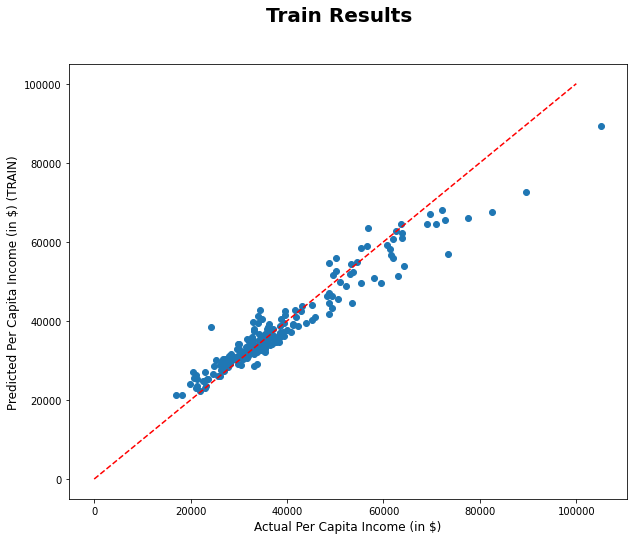

In [ ]:
# Scatterplot for train results
plt.figure(figsize=(10, 8))
plt.scatter(x=y_train, y=train_preds)
plt.plot([0, 100000], [0, 100000], '--k', color='red') # 45 degree line
plt.axis('tight')
plt.xlabel('Actual Per Capita Income (in $)', fontsize = 12)
plt.ylabel('Predicted Per Capita Income (in $) (TRAIN)', fontsize=12)
plt.suptitle('Train Results', fontsize = 20, fontweight="bold")
plt.show()

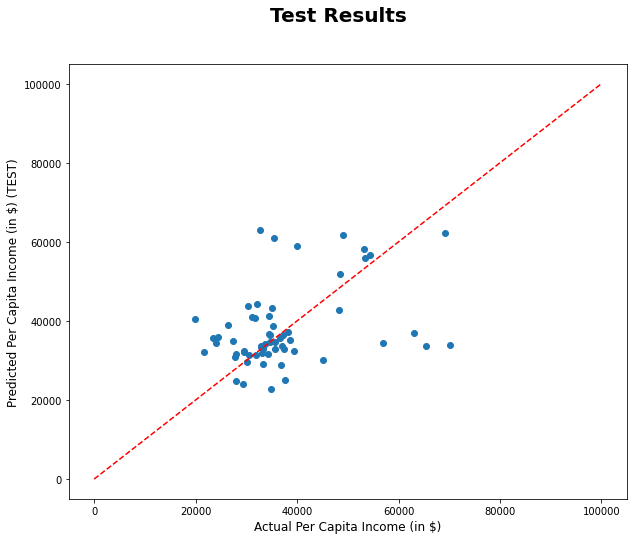

In [ ]:
# Scatterplot for test results
plt.figure(figsize=(10, 8))
plt.scatter(x=y_test, y=test_preds)
plt.plot([0, 100000], [0, 100000], '--k', color='red') # 45 degree line
plt.axis('tight')
plt.xlabel('Actual Per Capita Income (in $)', fontsize = 12)
plt.ylabel('Predicted Per Capita Income (in $) (TEST)', fontsize=12)
plt.suptitle('Test Results', fontsize = 20, fontweight="bold")
plt.show()

### Simple view

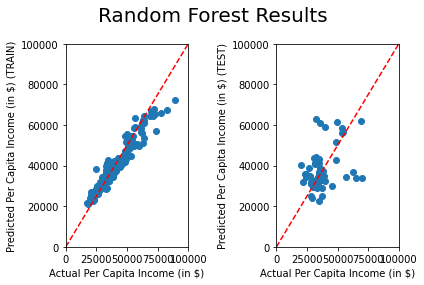

In [ ]:
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# fig limits


# add a main title across top
fig.suptitle("Random Forest Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x= y_train, y= train_preds) #first row, first entry (left top)
axes[0].set_xlabel("Actual Per Capita Income (in $)", fontsize=10)
axes[0].set_ylabel("Predicted Per Capita Income (in $) (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(0,100000)
axes[0].set_ylim(0,100000)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, '--k',color='red')


axes[1].scatter(x=y_test, y=test_preds) # first row, second entry (right top)
axes[1].set_xlabel("Actual Per Capita Income (in $)", fontsize=10)
axes[1].set_ylabel("Predicted Per Capita Income (in $) (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(0,100000)
axes[1].set_ylim(0,100000)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, '--k',color='red')

# tight layout
fig.tight_layout()

# scooch it down
fig.subplots_adjust(top=0.85)

# show the plot
plt.show()

# 9. Apply and evaluate the fitted model to ALL town-level data in Connecticut.

This will require to prep this new dataset the same way as for Massachussetts. 

Calculated error metrics and make one scatterplot of actual vs. predicted results for this new holdout sample.

In [ ]:
ctData = pd.read_html('https://en.wikipedia.org/wiki/List_of_Connecticut_locations_by_per_capita_income')[2]
ctData

,Rank,Town,Unnamed: 2,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New Canaan,Town,Fairfield,"$105,846","$174,611","$211,875",19738,6857
1,2.0,Darien,Town,Fairfield,"$105,846","$208,848","$343,456",20732,6555
2,3.0,Greenwich,Town,Fairfield,"$90,087","$128,153","$167,825",61171,22083
3,4.0,Weston,Town,Fairfield,"$92,794","$219,868","$285,612",10179,3379
4,5.0,Westport,Town,Fairfield,"$97,395","$181,360","$237,353",26391,9740
...,...,...,...,...,...,...,...,...,...
174,174.0,New London,City,New London,"$21,110","$43,551","$49,811",27620,10373
175,175.0,New Britain,City,Hartford,"$21,056","$39,706","$45,990",73206,28158
176,176.0,Windham,Town,Windham,"$20,272","$40,063","$48,145",25268,8906
177,177.0,Bridgeport,City,Fairfield,"$19,854","$41,047","$47,894",144229,51255


![CT econ data](https://upload.wikimedia.org/wikipedia/commons/6/6d/Connecticut_Towns_by_Median_Household_Income.png)

Figure: Map of municipalities by median household income (ACS 2015-2019). Areas with higher income are shaded more blue, areas with lower income are shaded more red.

*https://en.wikipedia.org/wiki/List_of_Connecticut_locations_by_per_capita_income

In [ ]:
ctData.to_csv('/content/drive/MyDrive/ctData.csv')

## Shape and Info of dataset

In [ ]:
ctData.shape

# 179 rows and 9 columns

(179, 9)

In [ ]:
ctData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   177 non-null    float64
 1   Town                   179 non-null    object 
 2   Unnamed: 2             179 non-null    object 
 3   County                 177 non-null    object 
 4   Per capitaincome       179 non-null    object 
 5   Medianhouseholdincome  179 non-null    object 
 6   Medianfamilyincome     179 non-null    object 
 7   Population             179 non-null    int64  
 8   Number ofhouseholds    179 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 12.7+ KB


## Cleaning the Data

### Checking the presence of "$" and "+" in appropriate columns

In [ ]:
ctData[ctData['Per capitaincome'].str.contains("\+")]
# no rows 

,Rank,Town,Unnamed: 2,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds


In [ ]:
ctData[ctData['Per capitaincome'].str.contains("\$")]
# all the 179 rows contain "$"

,Rank,Town,Unnamed: 2,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New Canaan,Town,Fairfield,"$105,846","$174,611","$211,875",19738,6857
1,2.0,Darien,Town,Fairfield,"$105,846","$208,848","$343,456",20732,6555
2,3.0,Greenwich,Town,Fairfield,"$90,087","$128,153","$167,825",61171,22083
3,4.0,Weston,Town,Fairfield,"$92,794","$219,868","$285,612",10179,3379
4,5.0,Westport,Town,Fairfield,"$97,395","$181,360","$237,353",26391,9740
...,...,...,...,...,...,...,...,...,...
174,174.0,New London,City,New London,"$21,110","$43,551","$49,811",27620,10373
175,175.0,New Britain,City,Hartford,"$21,056","$39,706","$45,990",73206,28158
176,176.0,Windham,Town,Windham,"$20,272","$40,063","$48,145",25268,8906
177,177.0,Bridgeport,City,Fairfield,"$19,854","$41,047","$47,894",144229,51255


In [ ]:
ctData[ctData['Medianhouseholdincome'].str.contains("\+")]
# no rows

,Rank,Town,Unnamed: 2,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds


In [ ]:
ctData[ctData['Medianhouseholdincome'].str.contains("\$")]
# all the 179 rows has "$"

,Rank,Town,Unnamed: 2,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New Canaan,Town,Fairfield,"$105,846","$174,611","$211,875",19738,6857
1,2.0,Darien,Town,Fairfield,"$105,846","$208,848","$343,456",20732,6555
2,3.0,Greenwich,Town,Fairfield,"$90,087","$128,153","$167,825",61171,22083
3,4.0,Weston,Town,Fairfield,"$92,794","$219,868","$285,612",10179,3379
4,5.0,Westport,Town,Fairfield,"$97,395","$181,360","$237,353",26391,9740
...,...,...,...,...,...,...,...,...,...
174,174.0,New London,City,New London,"$21,110","$43,551","$49,811",27620,10373
175,175.0,New Britain,City,Hartford,"$21,056","$39,706","$45,990",73206,28158
176,176.0,Windham,Town,Windham,"$20,272","$40,063","$48,145",25268,8906
177,177.0,Bridgeport,City,Fairfield,"$19,854","$41,047","$47,894",144229,51255


In [ ]:
ctData[ctData['Medianfamilyincome'].str.contains("\+")]
# no rows

,Rank,Town,Unnamed: 2,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds


In [ ]:
ctData[ctData['Medianfamilyincome'].str.contains("\$")]
# all the 179 rows has "$"

,Rank,Town,Unnamed: 2,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New Canaan,Town,Fairfield,"$105,846","$174,611","$211,875",19738,6857
1,2.0,Darien,Town,Fairfield,"$105,846","$208,848","$343,456",20732,6555
2,3.0,Greenwich,Town,Fairfield,"$90,087","$128,153","$167,825",61171,22083
3,4.0,Weston,Town,Fairfield,"$92,794","$219,868","$285,612",10179,3379
4,5.0,Westport,Town,Fairfield,"$97,395","$181,360","$237,353",26391,9740
...,...,...,...,...,...,...,...,...,...
174,174.0,New London,City,New London,"$21,110","$43,551","$49,811",27620,10373
175,175.0,New Britain,City,Hartford,"$21,056","$39,706","$45,990",73206,28158
176,176.0,Windham,Town,Windham,"$20,272","$40,063","$48,145",25268,8906
177,177.0,Bridgeport,City,Fairfield,"$19,854","$41,047","$47,894",144229,51255


### Replacing the characters

In [ ]:
ctData['Per capitaincome'] = ctData['Per capitaincome'].str.replace('$','') # replacing $ symbol with nothing
ctData['Medianhouseholdincome'] = ctData['Medianhouseholdincome'].str.replace('$','') # replacing $ symbol with nothing
ctData['Medianfamilyincome'] = ctData['Medianfamilyincome'].str.replace('$','') # replacing $ symbol with nothing

ctData['Per capitaincome'] = ctData['Per capitaincome'].str.replace(',','') # replacing $ symbol with nothing
ctData['Medianhouseholdincome'] = ctData['Medianhouseholdincome'].str.replace(',','') # replacing $ symbol with nothing
ctData['Medianfamilyincome'] = ctData['Medianfamilyincome'].str.replace(',','') # replacing $ symbol with nothing
ctData

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Rank,Town,Unnamed: 2,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New Canaan,Town,Fairfield,105846,174611,211875,19738,6857
1,2.0,Darien,Town,Fairfield,105846,208848,343456,20732,6555
2,3.0,Greenwich,Town,Fairfield,90087,128153,167825,61171,22083
3,4.0,Weston,Town,Fairfield,92794,219868,285612,10179,3379
4,5.0,Westport,Town,Fairfield,97395,181360,237353,26391,9740
...,...,...,...,...,...,...,...,...,...
174,174.0,New London,City,New London,21110,43551,49811,27620,10373
175,175.0,New Britain,City,Hartford,21056,39706,45990,73206,28158
176,176.0,Windham,Town,Windham,20272,40063,48145,25268,8906
177,177.0,Bridgeport,City,Fairfield,19854,41047,47894,144229,51255


### Changing columns astype to numeric

In [ ]:
ctData['Per capitaincome'] = ctData['Per capitaincome'].astype(np.int64)
ctData['Medianhouseholdincome'] = ctData['Medianhouseholdincome'].astype(np.int64)
ctData['Medianfamilyincome'] = ctData['Medianfamilyincome'].astype(np.int64)

In [ ]:
ctData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   177 non-null    float64
 1   Town                   179 non-null    object 
 2   Unnamed: 2             179 non-null    object 
 3   County                 177 non-null    object 
 4   Per capitaincome       179 non-null    int64  
 5   Medianhouseholdincome  179 non-null    int64  
 6   Medianfamilyincome     179 non-null    int64  
 7   Population             179 non-null    int64  
 8   Number ofhouseholds    179 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 12.7+ KB


### Flag variables

In [ ]:
ctData.rename(columns={ctData.columns[2]: 'Type'}, inplace=True) # renaming the unnamed column as 'Type'

In [ ]:
ctData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   177 non-null    float64
 1   Town                   179 non-null    object 
 2   Type                   179 non-null    object 
 3   County                 177 non-null    object 
 4   Per capitaincome       179 non-null    int64  
 5   Medianhouseholdincome  179 non-null    int64  
 6   Medianfamilyincome     179 non-null    int64  
 7   Population             179 non-null    int64  
 8   Number ofhouseholds    179 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 12.7+ KB


In [ ]:
ctData['Type'].unique()

array(['Town', 'Borough', 'City', 'State', 'Country'], dtype=object)

In [ ]:
ctData['Type'].replace(['Town', 'City', 'Essex', 'Borough', 'State', 'Country'],
                        [0, 1, 2, 3, 4, 5], inplace=True)

In [ ]:
ctData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   177 non-null    float64
 1   Town                   179 non-null    object 
 2   Type                   179 non-null    int64  
 3   County                 177 non-null    object 
 4   Per capitaincome       179 non-null    int64  
 5   Medianhouseholdincome  179 non-null    int64  
 6   Medianfamilyincome     179 non-null    int64  
 7   Population             179 non-null    int64  
 8   Number ofhouseholds    179 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 12.7+ KB


### Dropping null records

In [ ]:
ctData.isnull().sum()

Rank                     2
Town                     0
Type                     0
County                   2
Per capitaincome         0
Medianhouseholdincome    0
Medianfamilyincome       0
Population               0
Number ofhouseholds      0
dtype: int64

In [ ]:
ctData.dropna(axis = 0, inplace = True)

In [ ]:
ctData.isnull().sum()

Rank                     0
Town                     0
Type                     0
County                   0
Per capitaincome         0
Medianhouseholdincome    0
Medianfamilyincome       0
Population               0
Number ofhouseholds      0
dtype: int64

In [ ]:
ctData.to_csv('/content/drive/MyDrive/ctData_clean.csv')

In [ ]:
ctData

,Rank,Town,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New Canaan,0,Fairfield,105846,174611,211875,19738,6857
1,2.0,Darien,0,Fairfield,105846,208848,343456,20732,6555
2,3.0,Greenwich,0,Fairfield,90087,128153,167825,61171,22083
3,4.0,Weston,0,Fairfield,92794,219868,285612,10179,3379
4,5.0,Westport,0,Fairfield,97395,181360,237353,26391,9740
...,...,...,...,...,...,...,...,...,...
174,174.0,New London,1,New London,21110,43551,49811,27620,10373
175,175.0,New Britain,1,Hartford,21056,39706,45990,73206,28158
176,176.0,Windham,0,Windham,20272,40063,48145,25268,8906
177,177.0,Bridgeport,1,Fairfield,19854,41047,47894,144229,51255


## Assign Target Variable

In [ ]:
Y_ctData = ctData['Per capitaincome']

In [ ]:
Y_ctData

0      105846
1      105846
2       90087
3       92794
4       97395
        ...  
174     21110
175     21056
176     20272
177     19854
178     16798
Name: Per capitaincome, Length: 177, dtype: int64

In [ ]:
Y_ctData.to_numpy()

array([105846, 105846,  90087,  92794,  97395,  91709,  75634,  78131,
        58715,  66862,  61043,  68446,  67318,  55429,  58532,  66035,
        53427,  66822,  60155,  45901,  46429,  52413,  70264,  34015,
        49753,  52341,  58594,  49142,  63914,  53332,  47241,  46687,
        46401,  45404,  45308,  44983,  44850,  44667,  44060,  44006,
        43916,  43866,  43842,  53534,  43400,  43392,  43317,  43303,
        43149,  42312,  42184,  41926,  41909,  41883,  41709,  41669,
        41649,  41540,  41414,  41098,  40783,  40698,  40635,  40498,
        40126,  40022,  39738,  39704,  39588,  39579,  39562,  39486,
        39416,  39324,  39100,  38945,  38893,  38710,  38489,  38341,
        38339,  38286,  38158,  38134,  37902,  37690,  37663,  37329,
        37324,  37322,  37283,  37156,  37117,  37019,  36874,  36784,
        36747,  36682,  36608,  36342,  36297,  36053,  36021,  35780,
        35564,  35479,  35134,  34775,  34642,  34608,  34596,  34555,
      

## Model input parameters

In [ ]:
X_ctData = ctData[['Type','Population','Number ofhouseholds']]

In [ ]:
X_ctData

,Type,Population,Number ofhouseholds
0,0,19738,6857
1,0,20732,6555
2,0,61171,22083
3,0,10179,3379
4,0,26391,9740
...,...,...,...
174,1,27620,10373
175,1,73206,28158
176,0,25268,8906
177,1,144229,51255


In [ ]:
X_ctData.to_numpy()

array([[     0,  19738,   6857],
       [     0,  20732,   6555],
       [     0,  61171,  22083],
       [     0,  10179,   3379],
       [     0,  26391,   9740],
       [     0,  34427,  13121],
       [     0,  24638,   8902],
       [     0,  18062,   5953],
       [     0,  17550,   6872],
       [     0,  22290,   7318],
       [     0,   9158,   3528],
       [     0,   2262,    922],
       [     3,   2406,   1077],
       [     3,    929,    508],
       [     0,   7490,   2682],
       [     0,   1727,    753],
       [     0,   6683,   2992],
       [     0,  18098,   7024],
       [     0,  59404,  20233],
       [     0,  15502,   5238],
       [     0,   7603,   3145],
       [     0,  18269,   6779],
       [     0,   3578,   1466],
       [     0,   2979,   1104],
       [     0,   1420,    568],
       [     0,  25340,  10343],
       [     0,   8990,   3084],
       [     0,   1461,    601],
       [     0,   3581,   1427],
       [     0,   3741,   1518],
       [  

## Prediction using earlier model "clf"

In [ ]:
Y_ctData_holdout_preds = clf.predict(X_ctData)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
Y_ctData_holdout_preds

array([52088.67, 52088.67, 52088.67, 52088.67, 52088.67, 52088.67,
       52088.67, 52088.67, 52088.67, 52088.67, 52088.67, 52088.67,
       41349.27, 41349.27, 52088.67, 52088.67, 52088.67, 52088.67,
       52088.67, 52088.67, 52088.67, 52088.67, 52088.67, 52088.67,
       52088.67, 52088.67, 52088.67, 52088.67, 52088.67, 52088.67,
       52088.67, 52088.67, 52088.67, 52088.67, 52088.67, 52088.67,
       52088.67, 41349.27, 52088.67, 52088.67, 41349.27, 52088.67,
       52088.67, 52088.67, 52088.67, 52088.67, 52088.67, 41349.27,
       41349.27, 52088.67, 52088.67, 52088.67, 52088.67, 52088.67,
       52088.67, 52088.67, 52088.67, 52088.67, 52088.67, 52088.67,
       52088.67, 52088.67, 41349.27, 52088.67, 52088.67, 52088.67,
       52088.67, 52088.67, 52088.67, 41349.27, 52088.67, 52088.67,
       52088.67, 52088.67, 52088.67, 52088.67, 52088.67, 52088.67,
       41349.27, 52088.67, 52088.67, 52088.67, 52088.67, 52088.67,
       52088.67, 52088.67, 52088.67, 52088.67, 52088.67, 52088

## Prediction Metrics

### R2 Score

In [ ]:
print("This is X_ctData R2 (clf_ctData):", r2_score(Y_ctData, Y_ctData_holdout_preds)) # ctData variance explainability

This is X_ctData R2 (clf_ctData): -0.36073286581097097


### MAE

In [ ]:
ct_data_clf = mean_absolute_error(Y_ctData, Y_ctData_holdout_preds)
print("This is X_ctData (clf_ctData):", ct_data_clf) # test

This is X_ctData (clf_ctData): 15720.176214689263


## Plots

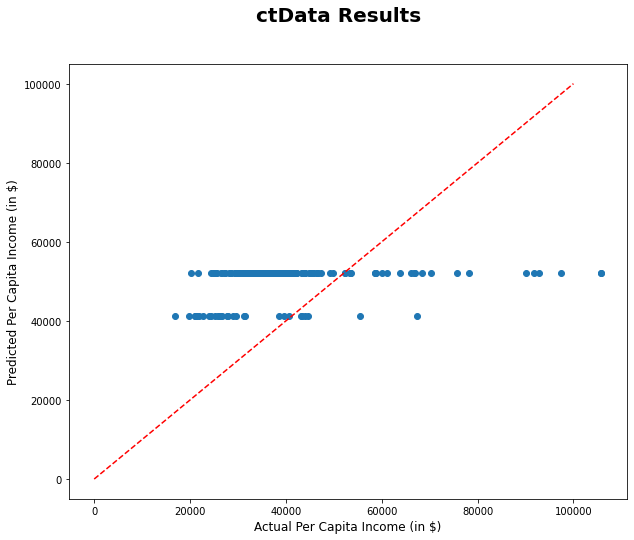

In [ ]:
# Scatterplot for ctData results
plt.figure(figsize=(10, 8))
plt.scatter(x= Y_ctData, y= Y_ctData_holdout_preds)
plt.plot([0, 100000], [0, 100000], '--k', color='red') # 45 degree line
plt.axis('tight')
plt.xlabel('Actual Per Capita Income (in $)', fontsize = 12)
plt.ylabel('Predicted Per Capita Income (in $)', fontsize=12)
plt.suptitle('ctData Results', fontsize = 20, fontweight="bold")
plt.show()

# 10. Five good bullets
Five good bullets about whether or not Massachussetts economic data was able to predict Connecticut economic data.

The Random Forest model built using Massachussetts data was unable to predict ctData:

1. From the scatter plot of "ctData Results" it is evident that predictions are way far away from actual values.

2. R2 score implies that the relationship between actual and predited values accounts for only 66% of the variation. Meaning there are lot of unknowns affecting the varaince which are not accounted in the model.

3. There are new "Type" categories for town in Connecticut Economic Data which were not present in Massachussetts data. The clf model is not modelled, trained and tested with all the expected inputs and hence, the prediction on CT data is not reliable.

4. The Mean Absolute Error on CT data is nearly double to that observed on Massachusetts Data. The clf model prediction errors were further worsened on CT data.

5. Model lacks other inpus such as "numer of households" which could have variance between different states and counties. As a result, the clf model could have been overfitted to Massachusetts Data and therefore had bad predictions for CT data.
